In [1]:

# Importing Libraries

import os
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image 
import cv2

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split


In [2]:
people_with_mask = os.listdir('data/with_mask')
people_without_mask = os.listdir('data/without_mask')

In [3]:
print('Number of with mask images:', len(people_with_mask))
print('Number of without mask images:', len(people_without_mask))

Number of with mask images: 3713
Number of without mask images: 3828



 Set up labels for each image, so that we can use it later in the model.



In [4]:

# if the image is with mask, the label is 1
# if the image is without mask, the label is 0

with_mask_labels = [1]*3713
without_mask_labels = [0]*3828

print(len(with_mask_labels))
print(len(without_mask_labels))

3713
3828


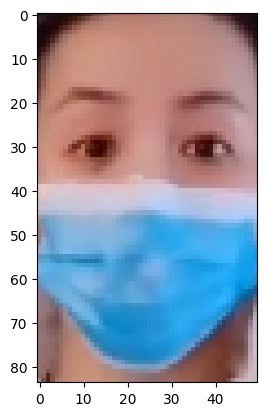

In [5]:
# displaying a random image with mask
img = mpimg.imread('data/with_mask/with_mask_15.jpg')

imgplot = plt.imshow(img)
plt.show()

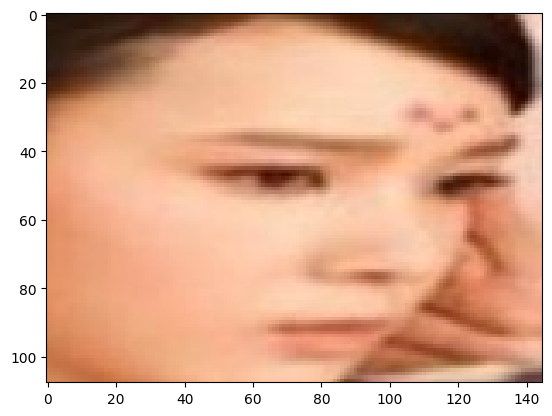

In [6]:
# displaying a randon image without mask
img = mpimg.imread('data/without_mask/without_mask_290.jpg')

imgplot = plt.imshow(img)
plt.show()

In [7]:

data = []

# Process images with masks
with_mask_path = os.path.join('data', 'with_mask')  
for img_file in people_with_mask:
    try:
        img_path = os.path.join(with_mask_path, img_file)
        image = Image.open(img_path)
        image = image.resize((28, 28))  
        image = image.convert('RGB')
        image = np.array(image)
        data.append(image)
    except Exception as e:
        print(f"Error processing {img_file}: {str(e)}")

# Process images without masks
without_mask_path = os.path.join('data', 'without_mask')
for img_file in people_without_mask:
    try:
        img_path = os.path.join(without_mask_path, img_file)
        image = Image.open(img_path)
        image = image.resize((28, 28))  
        image = image.convert('RGB')
        image = np.array(image)
        data.append(image)
    except Exception as e:
        print(f"Error processing {img_file}: {str(e)}")

data = np.array(data)

c:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [8]:
len(data)

7541

In [9]:
data.shape

(7541, 28, 28, 3)

In [10]:
data[10]

array([[[215, 215, 203],
        [216, 216, 204],
        [216, 216, 204],
        ...,
        [252, 252, 250],
        [252, 252, 250],
        [251, 251, 249]],

       [[213, 213, 201],
        [213, 213, 201],
        [212, 212, 200],
        ...,
        [251, 251, 249],
        [251, 251, 249],
        [251, 251, 249]],

       [[211, 212, 198],
        [211, 212, 198],
        [209, 210, 196],
        ...,
        [251, 251, 249],
        [251, 251, 249],
        [251, 251, 249]],

       ...,

       [[210, 211, 196],
        [195, 183, 165],
        [144, 135, 124],
        ...,
        [ 64,  63,  58],
        [162, 163, 157],
        [249, 249, 246]],

       [[201, 193, 174],
        [154, 122,  97],
        [134, 128, 114],
        ...,
        [ 63,  59,  56],
        [120, 117, 114],
        [235, 236, 232]],

       [[200, 196, 180],
        [183, 171, 154],
        [143, 143, 134],
        ...,
        [ 70,  66,  63],
        [ 87,  84,  80],
        [201, 202, 198]]

In [11]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(with_mask_labels + without_mask_labels)

In [12]:
print(X.shape)
print(Y.shape)

(7541, 28, 28, 3)
(7541,)


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [14]:
print( X.shape, X_train.shape, X_test.shape )

(7541, 28, 28, 3) (6032, 28, 28, 3) (1509, 28, 28, 3)


In [15]:
# Standardizing the data

X_train_scaled = X_train/255
X_test_scaled  = X_test/255


In [16]:
X_train_scaled[10]

array([[[0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00392157, 0.01176471],
        ...,
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314]],

       [[0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314],
        [0.        , 0.        , 0.        ],
        ...,
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314]],

       [[0.05490196, 0.05490196, 0.05490196],
        [0.00784314, 0.00784314, 0.00784314],
        [0.01960784, 0.02352941, 0.02352941],
        ...,
        [0.02745098, 0.02745098, 0.02352941],
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314]],

       ...,

       [[0.81176471, 0.81568627, 0.83529412],
        [0.83137255, 0.83137255, 0.85490196],
        [0.83529412, 0

In [17]:


model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Flatten(),
     
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(2, activation='sigmoid')
])



c:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.7308 - loss: 0.5089 - val_accuracy: 0.8891 - val_loss: 0.2920
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9087 - loss: 0.2526 - val_accuracy: 0.8990 - val_loss: 0.2610
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9102 - loss: 0.2271 - val_accuracy: 0.9089 - val_loss: 0.2167
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9301 - loss: 0.1862 - val_accuracy: 0.9338 - val_loss: 0.2036
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9486 - loss: 0.1496 - val_accuracy: 0.9238 - val_loss: 0.2145


In [20]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9295 - loss: 0.2003
Test Accuracy = 0.927766740322113


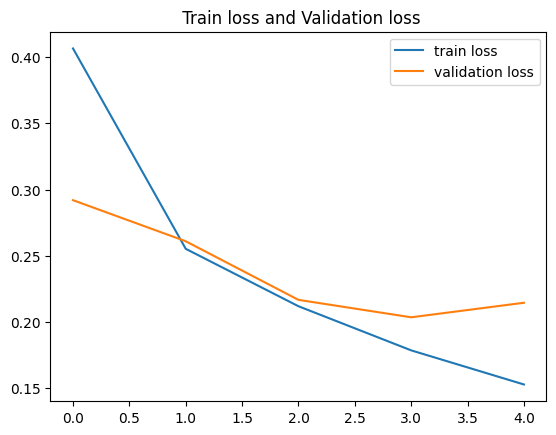

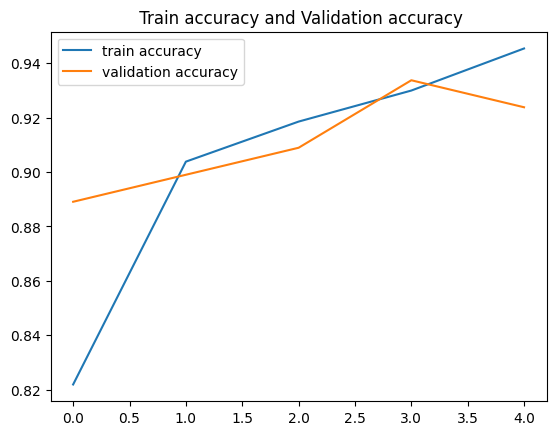

In [27]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.title(' Train loss and Validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.title(' Train accuracy and Validation accuracy')
plt.legend()
plt.show()

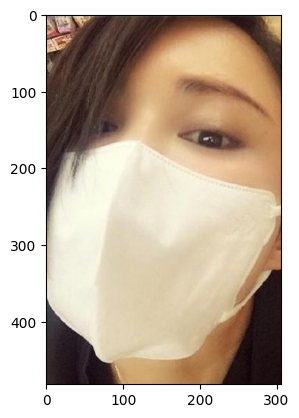

In [30]:
# displaying a random image with mask in order to prove that the model is working with a real image
img = mpimg.imread('data/with_mask/with_mask_21.jpg')

imgplot = plt.imshow(img)
plt.show()

In [23]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

input_image_resized = cv2.resize(input_image, (28, 28))  
input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1, 28, 28, 3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
    print('The person in the image is wearing a mask')
else:
    print('The person in the image is not wearing a mask')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
[[0.42523825 0.65743166]]
1
The person in the image is wearing a mask
